## Creating a baseline model using the cleaned data (before advanced feature engineering)

In [1]:
# Import the necessary packages
import os

# For calculating
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#for modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
X_train = pd.read_csv("../data/X_train.csv", dtype={'continent_dep': 'string', 'continent_arr': 'string'}, na_values=[''])
y_train = pd.read_csv("../data/y_train.csv")
X_test = pd.read_csv("../data/X_test.csv", dtype={'continent_dep': 'string', 'continent_arr': 'string'}, na_values=[''])
y_test = pd.read_csv("../data/y_test.csv")

In [3]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


X_train shape: (74943, 147)
X_test shape: (18736, 147)


In [4]:
X_train.head(20)

,is_same_country,airline_5K,airline_5M,airline_6P,airline_BJ,airline_D4,airline_GJ,airline_GW,airline_OL,airline_PS,...,iso_country_arr_SI,iso_country_arr_SK,iso_country_arr_SN,iso_country_arr_TG,iso_country_arr_TN,iso_country_arr_TR,iso_country_arr_UA,type_arr_large_airport,type_arr_medium_airport,type_arr_small_airport
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
6,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [5]:
print("Remaining Features in X_train:")
print(X_train.columns)

Remaining Features in X_train:
Index(['is_same_country', 'airline_5K', 'airline_5M', 'airline_6P',
       'airline_BJ', 'airline_D4', 'airline_GJ', 'airline_GW', 'airline_OL',
       'airline_PS',
       ...
       'iso_country_arr_SI', 'iso_country_arr_SK', 'iso_country_arr_SN',
       'iso_country_arr_TG', 'iso_country_arr_TN', 'iso_country_arr_TR',
       'iso_country_arr_UA', 'type_arr_large_airport',
       'type_arr_medium_airport', 'type_arr_small_airport'],
      dtype='object', length=147)


In [6]:
# Initialize Linear Regression model
baseline_model = LinearRegression()

# Train the model
baseline_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = baseline_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print results
print(f"Model Performance on Test Set:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Model Performance on Test Set:
Mean Absolute Error (MAE): 13538593.97
Root Mean Squared Error (RMSE): 1263281986.02


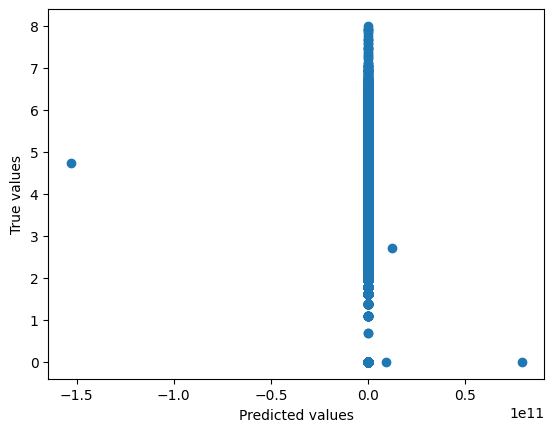

In [7]:
plt.scatter(y_pred, y_test) 
plt.ylabel("True values")
plt.xlabel("Predicted values")
plt.show()

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.8733e+04, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-1.53047326e+11, -1.29845096e+11, -1.06642867e+11, -8.34406377e+10,
        -6.02384083e+10, -3.70361790e+10, -1.38339497e+10,  9.36827963e+09,
         3.25705089e+10,  5.57727383e+10,  7.89749676e+10]),
 <BarContainer object of 10 artists>)

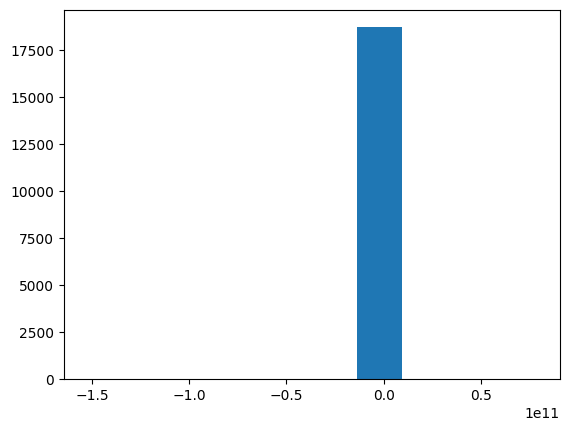

In [8]:
plt.hist(y_pred)

In [9]:
rows_with_all_false_or_zero = X_train[ (X_train == False)].all(axis=1) # Filter the rows 
result = X_train[rows_with_all_false_or_zero]
result 

,is_same_country,airline_5K,airline_5M,airline_6P,airline_BJ,airline_D4,airline_GJ,airline_GW,airline_OL,airline_PS,...,iso_country_arr_SI,iso_country_arr_SK,iso_country_arr_SN,iso_country_arr_TG,iso_country_arr_TN,iso_country_arr_TR,iso_country_arr_UA,type_arr_large_airport,type_arr_medium_airport,type_arr_small_airport


In [10]:
coefficients = np.array(baseline_model.coef_) 
coefficients_transp  = coefficients.reshape(-1, 1)
coefficients_df = pd.DataFrame(coefficients_transp, index=np.array(X_train.columns), columns=['Coefficient'])
coefficients_df.sort_values( by= 'Coefficient', ascending = False)

,Coefficient
continent_arr_AF,1.644176e+12
continent_arr_AS,1.037611e+12
continent_arr_EU,1.037611e+12
iso_country_arr_CA,9.586621e+11
airline_GW,4.875686e+11
...,...
iso_country_arr_RW,-6.855143e+11
iso_country_arr_DJ,-6.855143e+11
iso_country_arr_TG,-6.855143e+11
iso_country_arr_GA,-6.855143e+11


In [11]:
coefficients

array([[-4.32359439e-01,  4.87568567e+11,  4.87568567e+11,
         4.87568567e+11,  4.87568567e+11,  4.87568567e+11,
         4.87568567e+11,  4.87568567e+11,  4.87568567e+11,
         4.87568567e+11,  4.87568567e+11,  4.87568567e+11,
         4.87568567e+11,  4.87568567e+11,  4.87568567e+11,
        -1.00407445e+11, -1.00407445e+11, -1.00407445e+11,
        -1.00407445e+11, -1.00407445e+11, -1.00407445e+11,
        -1.00407445e+11, -2.70686383e+11, -2.70686383e+11,
        -2.70686383e+11, -2.70686383e+11, -2.70686383e+11,
         1.81561046e+11,  1.81561046e+11,  1.81561046e+11,
         1.81561046e+11,  1.81561046e+11, -2.76210053e+11,
        -4.43745650e+11, -4.43745650e+11, -1.39912688e+10,
         1.53544328e+11,  1.53544328e+11, -1.39912688e+10,
        -1.39912688e+10, -2.90201322e+11, -1.39912688e+10,
         1.53544328e+11, -1.39912688e+10,  1.53544328e+11,
         1.53544328e+11, -1.46568744e+09,  1.53544328e+11,
        -1.39912688e+10,  1.53544328e+11, -1.39912688e+1